In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
import scipy.io as sp
from sklearn.ensemble import IsolationForest, BaggingClassifier

dataSet = sp.loadmat('breastw.mat')
X = dataSet['X']
y = dataSet['y']
#print(y)

In [37]:
nombre_estim = np.arange(1,101,9) #permet de créer une liste de int de 1 à 100 pour faire varier le nombre d'estimateur dans la boucle for 

array([  1,  10,  19,  28,  37,  46,  55,  64,  73,  82,  91, 100])

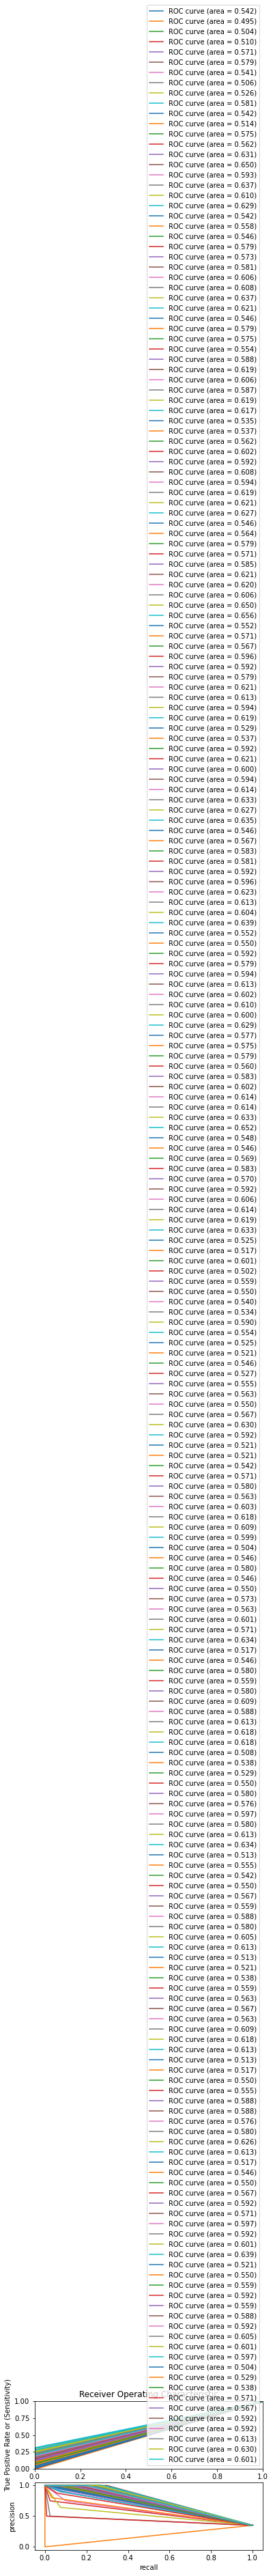

In [36]:
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

skf = StratifiedKFold(n_splits=2) 
skf.get_n_splits(X, y) #get and split return n split

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    for estim in nombre_estim:
    	for contam in np.linspace(0.01,0.05,10) :
            model = IsolationForest(contamination=contam, n_estimators=estim)
            model.fit(X_train)
    #print(model.predict(X_test))
    #model1 = [0 if elem == 1 else elem for elem in model.predict(X_test)]
    #print("nouvelle liste : " + str(model1))
    #model2 = [1 if elem == -1 else elem for elem in model1]
    #print("nouvelle liste : " + str(model2))
            y_pred=model.predict(X_test)
            y_pred[y_pred>0]=0
            y_pred[y_pred<0]=1
            #y_pred1=model.fit_predict(X_test) #Comparaison du .predict et du .fit_predict
            #y_pred1[y_pred1>0]=0
            #y_pred1[y_pred1<0]=1
            
            
        
            #print(".predict") #Comparaison du .predict et du .fit_predict
            #print(classification_report(y_test,y_pred))
            #print(confusion_matrix(y_test, y_pred))
            #print("fit_predict")
            #print(classification_report(y_test,y_pred1))
            #print(confusion_matrix(y_test, y_pred1))
            fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
            roc_auc = metrics.auc(fpr, tpr)
            plt.subplot(211)
            plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
            #plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.xlabel('False Positive Rate or (1 - Specifity)')
            plt.ylabel('True Positive Rate or (Sensitivity)')
            plt.title('Receiver Operating Characteristic')
            plt.legend(loc="lower right")
            
            plt.subplot(212)
            precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
            plt.plot(recall, precision)
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            #display plot
            #plt.show()
            #Comparaison du .predict et du .fit_predict
            
    
       


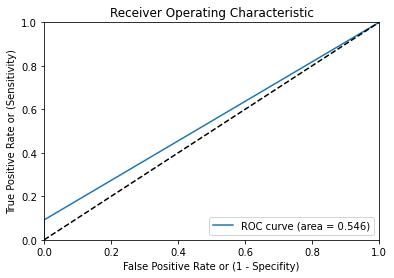

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
 

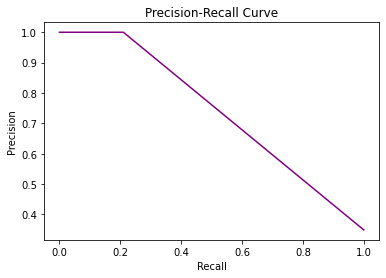

In [31]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
plt.show()
